<a href="https://colab.research.google.com/github/ack8151/ack8151/blob/main/%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%BD%98%ED%81%AC%EB%A6%AC%ED%8A%B8_%ED%92%88%EC%A7%88_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
uploaded=files.upload()


Saving Concrete_Data.xlsx to Concrete_Data.xlsx


In [27]:
HDNames= ['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']
Data = pd.read_excel('Concrete_Data.xlsx')

In [28]:

print(Data.head(20))

    Cement (component 1)(kg in a m^3 mixture)  \
0                                       540.0   
1                                       540.0   
2                                       332.5   
3                                       332.5   
4                                       198.6   
5                                       266.0   
6                                       380.0   
7                                       380.0   
8                                       266.0   
9                                       475.0   
10                                      198.6   
11                                      198.6   
12                                      427.5   
13                                      190.0   
14                                      304.0   
15                                      380.0   
16                                      139.6   
17                                      342.0   
18                                      380.0   
19                  

In [29]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [31]:
summary = Data.describe()
print(summary)

       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                

In [32]:
import seaborn as sns

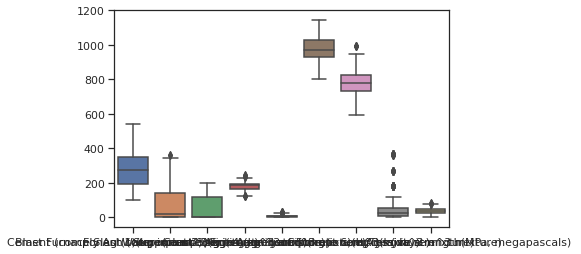

In [33]:
sns.set(style="ticks")
sns.boxplot(data = Data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


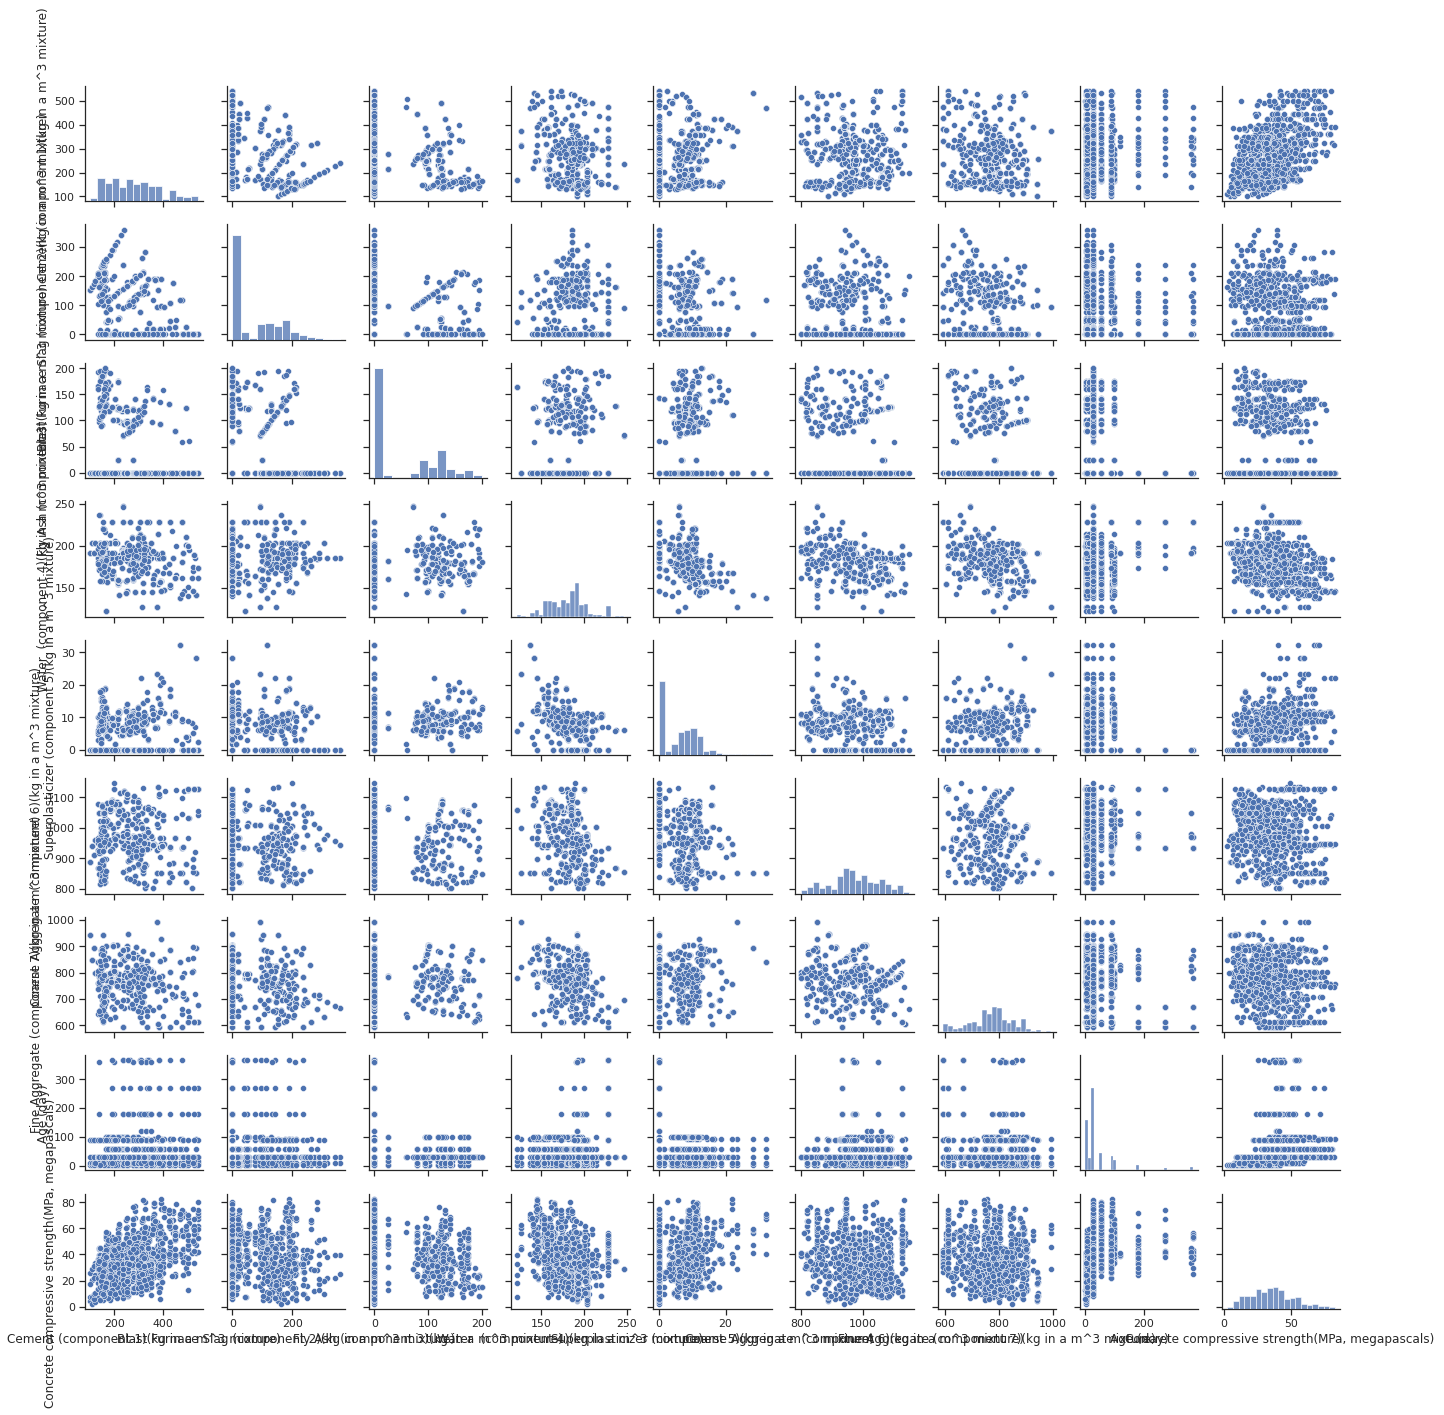

In [34]:
sns.pairplot(data = Data)

In [35]:
from sklearn.preprocessing import MinMaxScaler


In [36]:
scaler = MinMaxScaler()
print(scaler.fit(Data))

MinMaxScaler()


In [37]:
DataScaled = scaler.fit_transform(Data)
DataScaled = pd.DataFrame(DataScaled, columns=HDNames)


In [38]:
summary = DataScaled.describe()
print(summary)

            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean      0.409054     0.205608     0.270800     0.477576     0.192643   
std       0.238601     0.240064     0.319822     0.170504     0.185512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.206336     0.000000     0.000000     0.344511     0.000000   
50%       0.390183     0.061213     0.000000     0.504990     0.197205   
75%       0.566210     0.397746     0.591054     0.560878     0.315528   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean      0.499763     0.450524     0.122698     0.417181  
std       0.226029     0.201143     0.173544     0.208125  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.380814     0.343578  

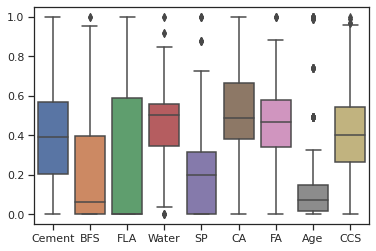

In [39]:
sns.boxplot(data = DataScaled)

# 심층 신경망 구축

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
Predictors = pd.DataFrame(DataScaled.iloc[:,:8])
Response = pd.DataFrame(DataScaled.iloc[:,8])


In [43]:
Pred_train, Pred_test, Resp_train, Resp_test = train_test_split(Predictors,Response, test_size = 0.30, random_state = 1)
print(Pred_train.shape)
print(Pred_test.shape)
print(Resp_train.shape)
print(Resp_test.shape)

(721, 8)
(309, 8)
(721, 1)
(309, 1)


In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [46]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(Pred_train, Resp_train, epochs=1000, verbose=1)

Epoch 1/1000
23/23 [==============================] - 2s 4ms/step - loss: 0.0552 - accuracy: 0.0014
Epoch 2/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.0014
Epoch 3/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.0014
Epoch 4/1000
23/23 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.0014
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.0014
Epoch 6/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.0014
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.0014
Epoch 8/1000
23/23 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.0014
Epoch 9/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.0014
Epoch 10/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.0014

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [48]:
from sklearn.metrics import r2_score

In [49]:
Y_predKM = model.predict(Pred_test)

In [50]:
print('Coefficient of determination of Keras Model')
print(r2_score(Resp_test, Y_predKM))

Coefficient of determination of Keras Model
0.8393019014465505


# 이상치 제거

In [51]:
Q1 = DataScaled.quantile(0.25)
Q3 = DataScaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cement    0.359874
BFS       0.397746
FLA       0.591054
Water     0.216367
SP        0.315528
CA        0.283140
FA        0.233442
Age       0.134615
CCS       0.279431
dtype: float64


In [52]:
DataScaledOut = DataScaled[~((DataScaled < (Q1 - 1.5 * IQR)) | (DataScaled > (Q3 + 1.5 * IQR))).any(axis=1)]
DataScaledOut.shape

(941, 9)

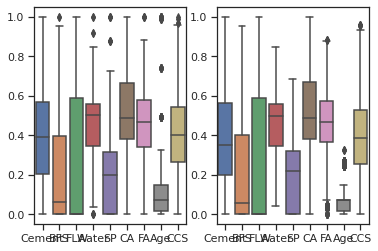

In [53]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)
sns.boxplot(data = DataScaled)
plt.subplot(122)
sns.boxplot(data = DataScaledOut)

In [54]:
Predictors2 = pd.DataFrame(DataScaledOut.iloc[:,:8])
Response2 = pd.DataFrame(DataScaledOut.iloc[:,8])


In [55]:
Pred_train2, Pred_test2, Resp_train2, Resp_test2 = train_test_split(Predictors2,Response2, test_size = 0.30, random_state = 1)
print(Pred_train2.shape)
print(Pred_test2.shape)
print(Resp_train2.shape)
print(Resp_test2.shape)

(658, 8)
(283, 8)
(658, 1)
(283, 1)


In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [58]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(Pred_train2, Resp_train2, epochs=1000, verbose=1)

Epoch 1/1000
21/21 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.0000e+00
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 3/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 4/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.0000e+00
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 6/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 7/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.0000e+00
Epoch 8/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 9/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 10/1000
21/21 [==============================] - 0s 3ms/st

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                180       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [60]:
Y_predKM2 = model.predict(Pred_test2)

print('Coefficient of determination of Keras Model')
print(r2_score(Resp_test, Y_predKM))

Coefficient of determination of Keras Model
0.8393019014465505


In [61]:
print('Coefficient of determination of Keras Model without outlier')
print(r2_score(Resp_test2, Y_predKM2))


Coefficient of determination of Keras Model without outlier
0.8743449664445297


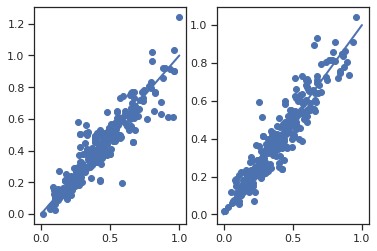

In [62]:
plt.figure(1)
plt.subplot(121)
plt.scatter(Resp_test,Y_predKM)
plt.plot([0, 1], [0, 1], linewidth=2)
plt.subplot(122)
plt.scatter(Resp_test2, Y_predKM2)
plt.plot([0, 1], [0, 1], linewidth=2)